In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

def plot_constraint(eq, color):
    x_values = np.linspace(0, 10, 100)
    y_values = (eq[2] - eq[0] * x_values) / eq[1]
    plt.plot(x_values, y_values, label=f'{eq[0]}x + {eq[1]}y <= {eq[2]}', color=color)

def plot_objective_function(obj_func, color):
    x_values = np.linspace(0, 10, 100)
    y_values = (obj_func[2] - obj_func[0] * x_values) / obj_func[1]
    plt.plot(x_values, y_values, label=f'{obj_func[0]}x + {obj_func[1]}y = {obj_func[2]}', linestyle='dashed', color=color)

def linear_programming_graphical_method(constraints, objective_function, problem_type):
    plt.figure(figsize=(8, 8))

    # Plot constraints
    for i, constraint in enumerate(constraints):
        plot_constraint(constraint, color=f'C{i}')

    # Plot objective function
    plot_objective_function(objective_function, color='black')

    # Set plot labels and legend
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()

    # Find and plot the feasible region
    x_values = np.linspace(0, 10, 100)
    for i, constraint in enumerate(constraints):
        y_values = (constraint[2] - constraint[0] * x_values) / constraint[1]
        if problem_type == 'min':
            plt.fill_between(x_values, 0, y_values, where=((constraint[0] * x_values) + constraint[1] * y_values) <= constraint[2], color=f'C{i}', alpha=0.3)
        elif problem_type == 'max':
            plt.fill_between(x_values, 0, y_values, where=((constraint[0] * x_values) + constraint[1] * y_values) >= constraint[2], color=f'C{i}', alpha=0.3)

    # Solve linear programming problem
    c = objective_function[:2] if problem_type == 'min' else -np.array(objective_function[:2])
    res = linprog(c, A_ub=constraints[:, :2], b_ub=constraints[:, 2], method='highs')

    # Display the results
    print_results(res, problem_type)

    # Show the plot
    plt.show()

def print_results(result, problem_type):
    print("\n=== Results ===")
    if problem_type == 'min':
        print(f"Decision Variables (x, y): ({result.x[0]:.2f}, {result.x[1]:.2f})")
        print(f"Objective Value: {result.fun:.2f}")
    elif problem_type == 'max':
        print(f"Decision Variables (x, y): ({result.x[0]:.2f}, {result.x[1]:.2f})")
        print(f"Objective Value: {-result.fun:.2f}")


=== Results ===
Decision Variables (x, y): (0.00, 0.00)
Objective Value: 0.00


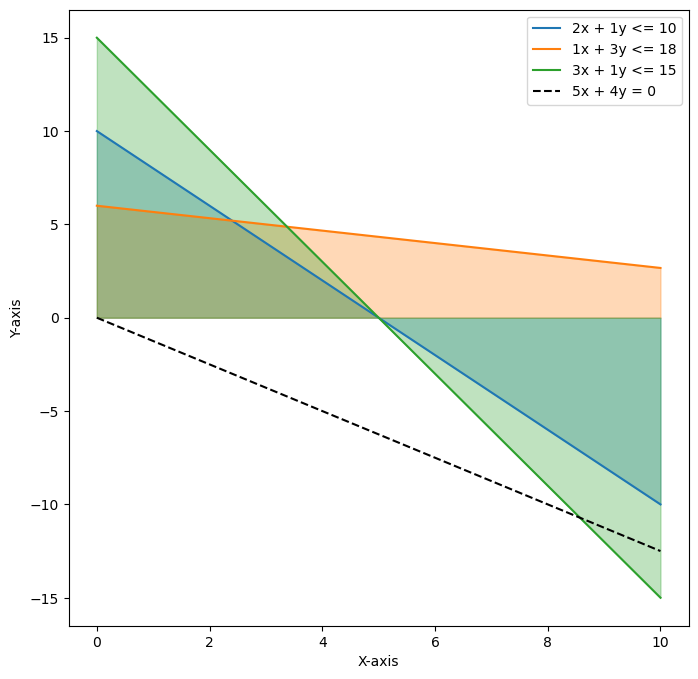

In [7]:
# Minimization problem
constraints_min = np.array([[2, 1, 10], [1, 3, 18], [3, 1, 15]])
objective_function_min = [5, 4, 0] 
linear_programming_graphical_method(constraints_min, objective_function_min, 'min')


=== Results ===
Decision Variables (x, y): (1.14, 2.57)
Objective Value: 54.86


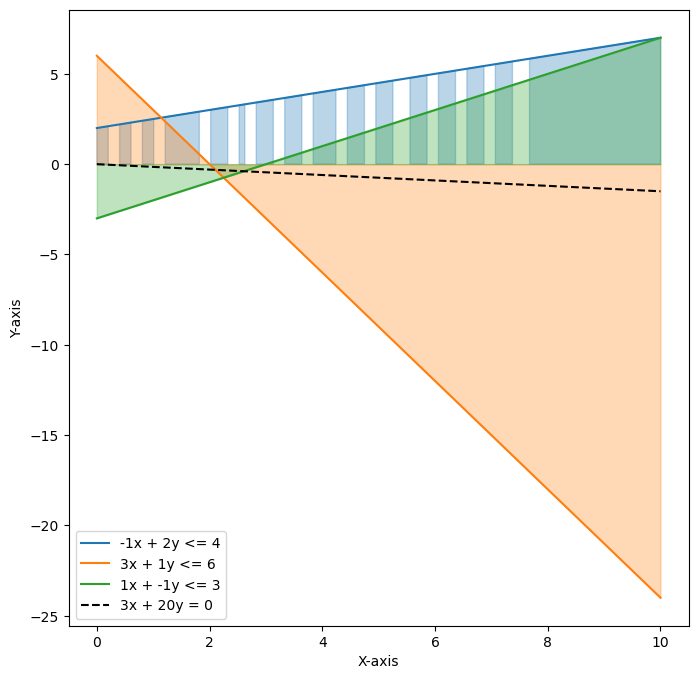

In [9]:
# Maximization problem
constraints_max = np.array([[-1, 2, 4], [3, 1, 6], [1, -1, 3]])
objective_function_max = [3, 20, 0]  
linear_programming_graphical_method(constraints_max, objective_function_max, 'max')

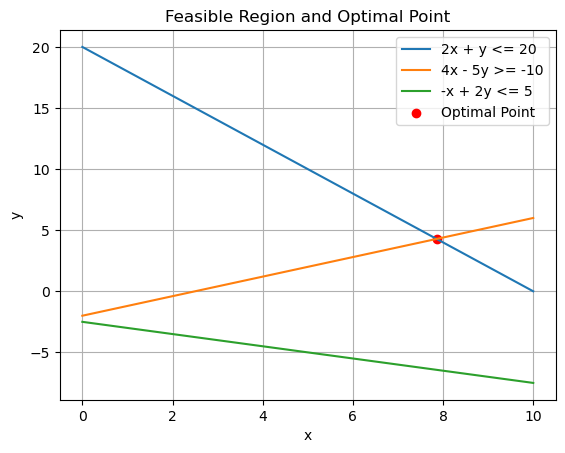

Decision Variables: [7.85714286 4.28571429 0.        ]
Objective Value: 32.14285714285714


/tmp/ipykernel_7739/4228432342.py:53: RuntimeWarning: divide by zero encountered in divide
  Z1 = (b[0] - A[0, 0] * X - A[0, 1] * Y) / A[0, 2]
/tmp/ipykernel_7739/4228432342.py:53: RuntimeWarning: invalid value encountered in divide
  Z1 = (b[0] - A[0, 0] * X - A[0, 1] * Y) / A[0, 2]
/tmp/ipykernel_7739/4228432342.py:54: RuntimeWarning: divide by zero encountered in divide
  Z2 = (b[1] - A[1, 0] * X - A[1, 1] * Y) / A[1, 2]
/tmp/ipykernel_7739/4228432342.py:54: RuntimeWarning: invalid value encountered in divide
  Z2 = (b[1] - A[1, 0] * X - A[1, 1] * Y) / A[1, 2]
/tmp/ipykernel_7739/4228432342.py:55: RuntimeWarning: divide by zero encountered in divide
  Z3 = (b[2] - A[2, 0] * X - A[2, 1] * Y) / A[2, 2]


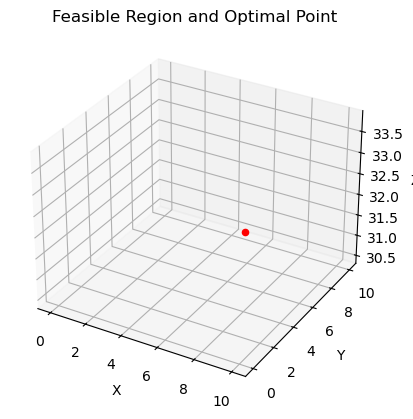

Decision Variables: [7.85714286 4.28571429 0.        ]
Objective Value: 32.14285714285714


In [4]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def simplex_solver(c, A, b, maximize=True):
    if maximize:
        c = -c  # Convert maximization to minimization
    result = linprog(c, A_ub=A, b_ub=b, method='highs')
    
    return result

def plot_2d_solution(c, A, b, maximize=True):
    result = simplex_solver(c, A, b, maximize)

    # Plotting the feasible region
    x = np.linspace(0, 10, 100)
    y1 = (b[0] - A[0, 0] * x) / A[0, 1]
    y2 = (b[1] - A[1, 0] * x) / A[1, 1]
    y3 = (b[2] - A[2, 0] * x) / A[2, 1]

    plt.plot(x, y1, label='2x + y <= 20')
    plt.plot(x, y2, label='4x - 5y >= -10')
    plt.plot(x, y3, label='-x + 2y <= 5')

    # Highlighting the optimal point
    plt.scatter(result.x[0], result.x[1], color='red', marker='o', label='Optimal Point')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Feasible Region and Optimal Point')
    plt.legend()
    plt.grid(True)
    plt.show()

    print_solution(result)

def print_solution(result):
    print("Decision Variables:", result.x)
    print("Objective Value:", -result.fun)  # Convert back to maximization if needed

def plot_3d_solution(c, A, b, maximize=True):
    result = simplex_solver(c, A, b, maximize)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plotting the feasible region
    x = np.linspace(0, 10, 100)
    y = np.linspace(0, 10, 100)
    X, Y = np.meshgrid(x, y)

    Z1 = (b[0] - A[0, 0] * X - A[0, 1] * Y) / A[0, 2]
    Z2 = (b[1] - A[1, 0] * X - A[1, 1] * Y) / A[1, 2]
    Z3 = (b[2] - A[2, 0] * X - A[2, 1] * Y) / A[2, 2]

    ax.plot_surface(X, Y, Z1, alpha=0.5, rstride=100, cstride=100)
    ax.plot_surface(X, Y, Z2, alpha=0.5, rstride=100, cstride=100)
    ax.plot_surface(X, Y, Z3, alpha=0.5, facecolors='g', rstride=100, cstride=100)

    # Highlighting the optimal point
    ax.scatter(result.x[0], result.x[1], -result.fun, color='red', marker='o', label='Optimal Point')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Feasible Region and Optimal Point')
    plt.show()

    print_solution(result)

# Example usage:
c = np.array([-3, -2, 0])  # Coefficients of the objective function
A = np.array([[2, 1, 0], [-4, 5, 0], [-1, -2, 0]])  # Coefficients of the constraints
b = np.array([20, -10, 5])  # Right-hand side values of the constraints

# Visualize in 2D
plot_2d_solution(c, A, b,False)

# Visualize in 3D
plot_3d_solution(c, A, b,False)


Optimal Assignments:
[[1 0 0]
 [0 0 1]
 [0 1 0]]
Total Cost: 9


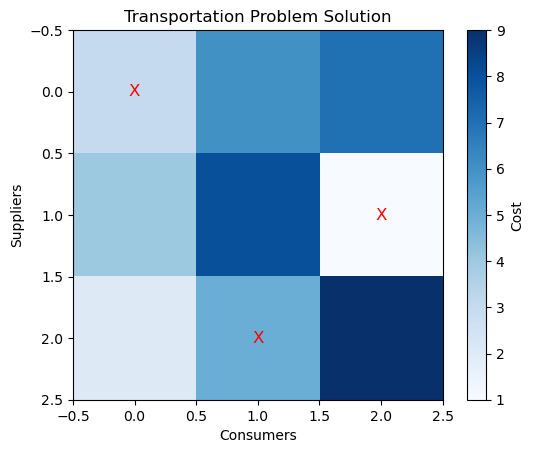

In [12]:
import numpy as np
from scipy.optimize import linear_sum_assignment
import matplotlib.pyplot as plt

def transportation_problem(cost_matrix, supplies, demands):
    # Solve the transportation problem using linear_sum_assignment
    _, assignment = linear_sum_assignment(cost_matrix)

    # Extract optimal assignment
    assignments = np.zeros_like(cost_matrix)
    assignments[np.arange(len(assignment)), assignment] = 1

    # Calculate total cost
    total_cost = np.sum(assignments * cost_matrix)

    return assignments, total_cost

def plot_transportation_result(cost_matrix, assignments):
    plt.imshow(cost_matrix, cmap='Blues', interpolation='nearest', origin='upper')
    for i in range(assignments.shape[0]):
        for j in range(assignments.shape[1]):
            if assignments[i, j] == 1:
                plt.text(j, i, 'X', color='red', ha='center', va='center', fontsize=12)

    plt.xlabel('Consumers')
    plt.ylabel('Suppliers')
    plt.title('Transportation Problem Solution')
    plt.colorbar(label='Cost')
    plt.show()

# Example
cost_matrix = np.array([[3, 6, 7], [4, 8, 1], [2, 5, 9]])
supplies = np.array([20, 30, 50])
demands = np.array([30, 40, 30])

assignments, total_cost = transportation_problem(cost_matrix, supplies, demands)

print("Optimal Assignments:")
print(assignments)
print("Total Cost:", total_cost)

# Plot the result
plot_transportation_result(cost_matrix, assignments)


Optimal Assignments:
[[1 0 0]
 [0 0 1]
 [0 1 0]]
Total Cost: 9


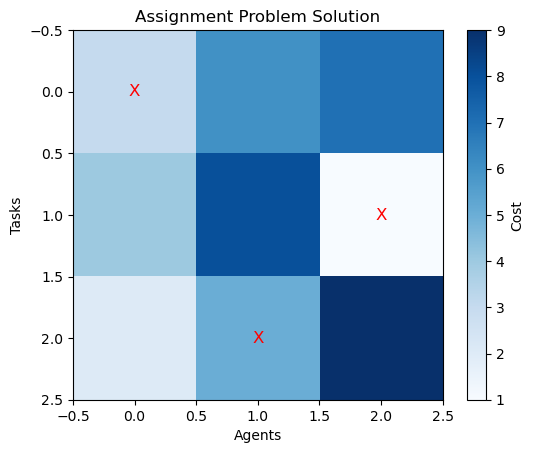

In [13]:
import numpy as np
from scipy.optimize import linear_sum_assignment
import matplotlib.pyplot as plt

def assignment_problem(cost_matrix):
    # Solve the assignment problem using linear_sum_assignment
    _, assignment = linear_sum_assignment(cost_matrix)

    # Extract optimal assignment
    assignments = np.zeros_like(cost_matrix)
    assignments[np.arange(len(assignment)), assignment] = 1

    # Calculate total cost
    total_cost = np.sum(assignments * cost_matrix)

    return assignments, total_cost

def plot_assignment_result(cost_matrix, assignments):
    plt.imshow(cost_matrix, cmap='Blues', interpolation='nearest', origin='upper')
    for i in range(assignments.shape[0]):
        for j in range(assignments.shape[1]):
            if assignments[i, j] == 1:
                plt.text(j, i, 'X', color='red', ha='center', va='center', fontsize=12)

    plt.xlabel('Agents')
    plt.ylabel('Tasks')
    plt.title('Assignment Problem Solution')
    plt.colorbar(label='Cost')
    plt.show()

# Example
cost_matrix = np.array([[3, 6, 7], [4, 8, 1], [2, 5, 9]])

assignments, total_cost = assignment_problem(cost_matrix)

print("Optimal Assignments:")
print(assignments)
print("Total Cost:", total_cost)

# Plot the result
plot_assignment_result(cost_matrix, assignments)
